In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.1 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=542b5af98c2d2e1f1216b54d3fc28d888292df78a8ef6c1d3d4631d95fd27efa
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
!pip install -q findspark

importing necessary libraries 

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import *

find spark can add a startup file to the current IPython profile

In [ ]:
import findspark

SparkSession entry point for df and SQL functionalities
getOrCreate used for existing SparkSession

In [ ]:
spark=SparkSession.builder.getOrCreate()

In [ ]:
from google.colab import files
files.upload()

Saving ipl_2022_dataset.csv to ipl_2022_dataset.csv


{'ipl_2022_dataset.csv': b',Player,Base Price,TYPE,COST IN \xe2\x82\xb9 (CR.),Cost IN $ (000),2021 Squad,Team\n0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans\n1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans\n2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans\n3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans\n4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans\n5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans\n6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,,Gujarat Titans\n7,David Miller,1 Cr,BATTER,3.0,390.0,RR,Gujarat Titans\n8,R. Sai Kishore,20 Lakh,BOWLER,3.0,390.0,CSK,Gujarat Titans\n9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,,Gujarat Titans\n10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,,Gujarat Titans\n11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,,Gujarat Titans\n12,Jason Roy,2 Cr,BATTER,2.0,260.0,SRH,Gujarat Titans\n13,Wriddhiman Saha,1 Cr,WICKETKEEPER,1.9,247.0,SRH,Gujarat Titans\n14,Jayant Yadav,1 Cr,A

In [ ]:
df = spark.read.csv("ipl_2022_dataset.csv",header=True,inferSchema=True)


In [ ]:
df.show()

+---+-------------------+----------+------------+---------------+---------------+----------+--------------+
|_c0|             Player|Base Price|        TYPE|COST IN ₹ (CR.)|Cost IN $ (000)|2021 Squad|          Team|
+---+-------------------+----------+------------+---------------+---------------+----------+--------------+
|  0|        Rashid Khan|Draft Pick|      BOWLER|           15.0|         1950.0|       SRH|Gujarat Titans|
|  1|      Hardik Pandya|Draft Pick| ALL-ROUNDER|           15.0|         1950.0|        MI|Gujarat Titans|
|  2|    Lockie Ferguson|      2 Cr|      BOWLER|           10.0|         1300.0|       KKR|Gujarat Titans|
|  3|      Rahul Tewatia|   40 Lakh| ALL-ROUNDER|            9.0|         1170.0|        RR|Gujarat Titans|
|  4|       Shubman Gill|Draft Pick|      BATTER|            8.0|         1040.0|       KKR|Gujarat Titans|
|  5|     Mohammad Shami|      2 Cr|      BOWLER|           6.25|          812.5|      PBKS|Gujarat Titans|
|  6|         Yash Dayal|   

In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Player: string (nullable = true)
 |-- Base Price: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- COST IN ₹ (CR.): double (nullable = true)
 |-- Cost IN $ (000): double (nullable = true)
 |-- 2021 Squad: string (nullable = true)
 |-- Team: string (nullable = true)



In [ ]:
print("Rows:",df.count())

Rows: 633


In [ ]:
print("Columns: ",len(df.columns))

Columns:  8


In [ ]:
df.select("BASE PRICE").distinct().collect()

[Row(BASE PRICE='20 Lakh'),
 Row(BASE PRICE='2 Cr'),
 Row(BASE PRICE='Draft Pick'),
 Row(BASE PRICE='40 Lakh'),
 Row(BASE PRICE='30 Lakh'),
 Row(BASE PRICE='1 Cr'),
 Row(BASE PRICE='50 Lakh'),
 Row(BASE PRICE='1.5 Cr'),
 Row(BASE PRICE='75 Lakh'),
 Row(BASE PRICE='Retained')]

In [ ]:
df.groupBy("Base Price").count().show() 

+----------+-----+
|Base Price|count|
+----------+-----+
|   20 Lakh|  344|
|      2 Cr|   48|
|Draft Pick|    6|
|   40 Lakh|   16|
|   30 Lakh|    9|
|      1 Cr|   33|
|   50 Lakh|  104|
|    1.5 Cr|   20|
|   75 Lakh|   26|
|  Retained|   27|
+----------+-----+



In [ ]:
df2 = df.withColumnRenamed("Player","player")\
        .withColumnRenamed("Base Price","base_player")\
        .withColumnRenamed("TYPE","type")\
        .withColumnRenamed("COST IN ₹ (CR.)","cost_inr")\
        .withColumnRenamed("Cost IN $ (000)","cost_usd")\
        .withColumnRenamed("2021 Squad","2021_team")\
        .withColumnRenamed("Team","2022_team")

In [ ]:
df2.show(5)

+---+---------------+-----------+-----------+--------+--------+---------+--------------+
|_c0|         player|base_player|       type|cost_inr|cost_usd|2021_team|     2022_team|
+---+---------------+-----------+-----------+--------+--------+---------+--------------+
|  0|    Rashid Khan| Draft Pick|     BOWLER|    15.0|  1950.0|      SRH|Gujarat Titans|
|  1|  Hardik Pandya| Draft Pick|ALL-ROUNDER|    15.0|  1950.0|       MI|Gujarat Titans|
|  2|Lockie Ferguson|       2 Cr|     BOWLER|    10.0|  1300.0|      KKR|Gujarat Titans|
|  3|  Rahul Tewatia|    40 Lakh|ALL-ROUNDER|     9.0|  1170.0|       RR|Gujarat Titans|
|  4|   Shubman Gill| Draft Pick|     BATTER|     8.0|  1040.0|      KKR|Gujarat Titans|
+---+---------------+-----------+-----------+--------+--------+---------+--------------+
only showing top 5 rows



In [ ]:
df2.select("player","cost_inr").show()

+-------------------+--------+
|             player|cost_inr|
+-------------------+--------+
|        Rashid Khan|    15.0|
|      Hardik Pandya|    15.0|
|    Lockie Ferguson|    10.0|
|      Rahul Tewatia|     9.0|
|       Shubman Gill|     8.0|
|     Mohammad Shami|    6.25|
|         Yash Dayal|     3.2|
|       David Miller|     3.0|
|     R. Sai Kishore|     3.0|
|Abhinav Sadarangani|     2.6|
|       Matthew Wade|     2.4|
|     Alzarri Joseph|     2.4|
|          Jason Roy|     2.0|
|    Wriddhiman Saha|     1.9|
|       Jayant Yadav|     1.7|
|      Vijay Shankar|     1.4|
|     Dominic Drakes|     1.1|
|        Varun Aaron|     0.5|
|    Gurkeerat Singh|     0.5|
|         Noor Ahmad|     0.3|
+-------------------+--------+
only showing top 20 rows



In [ ]:
df2.createOrReplaceTempView("ipl")


In [ ]:
spark.sql("""select player,cost_inr from ipl where type ='BATTER' order by 2 desc limit 3""").show()

+---------------+--------+
|         player|cost_inr|
+---------------+--------+
|   Rohit Sharma|    16.0|
|    Virat Kohli|    15.0|
|Kane Williamson|    14.0|
+---------------+--------+



In [ ]:
spark.sql("""select player,cost_inr from ipl where type ='BOWLER' order by 2 desc limit 5""").show()

+--------------+--------+
|        player|cost_inr|
+--------------+--------+
|   Rashid Khan|    15.0|
| Deepak Chahar|    14.0|
|Jasprit Bumrah|    12.0|
|Shardul Thakur|   10.75|
|    Avesh Khan|    10.0|
+--------------+--------+



In [ ]:
spark.sql("""select player,cost_inr from ipl where type ='ALL-ROUNDER' order by 2 desc limit 5""").show()

+----------------+--------+
|          player|cost_inr|
+----------------+--------+
| Ravindra Jadeja|    16.0|
|   Hardik Pandya|    15.0|
|   Andre Russell|    12.0|
|Liam Livingstone|    11.5|
|   Glenn Maxwell|    11.0|
+----------------+--------+



In [ ]:
spark.sql("""select player,cost_inr from ipl where type ='WICKETKEEPER' and cost_inr is not null order by 2 limit 5""").show()

+---------------+--------+
|         player|cost_inr|
+---------------+--------+
|    Dhruv Jurel|     0.2|
|  Jitesh Sharma|     0.2|
|  N. Jagadeesan|     0.2|
|    Aryan Juyal|     0.2|
|Luvnith Sisodia|     0.2|
+---------------+--------+



In [ ]:
spark.sql("""select type,round(avg(cost_inr),2) average_price from ipl group by 1 order by 2 desc""").show()

+------------+-------------+
|        type|average_price|
+------------+-------------+
|WICKETKEEPER|         5.09|
|      BATTER|         4.11|
| ALL-ROUNDER|         3.61|
|      BOWLER|         3.07|
+------------+-------------+



In [ ]:
spark.sql("""select player,cost_inr from ipl where base_player = 'Retained' order by 2 desc limit 5""").show()

+---------------+--------+
|         player|cost_inr|
+---------------+--------+
|Ravindra Jadeja|    16.0|
|   Rishabh Pant|    16.0|
|   Rohit Sharma|    16.0|
|    Virat Kohli|    15.0|
|   Sanju Samson|    14.0|
+---------------+--------+



In [ ]:
import matplotlib.pyplot as plt

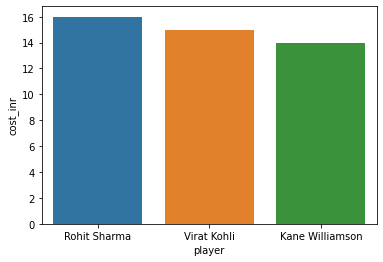

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""select player, cost_inr from ipl where type ='BATTER' order by 2 desc limit 3""").toPandas()

# Use the 'player' column for the x-axis and the 'cost_inr' column for the y-axis
sns.barplot(x='player', y='cost_inr', data=df2 )

# Show the plot
plt.show()


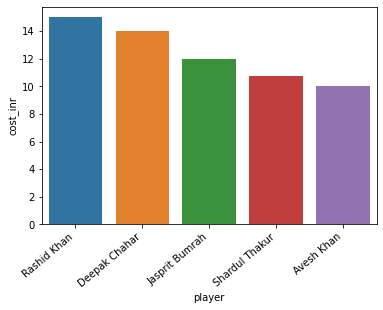

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""select player, cost_inr from ipl where type ='BOWLER' order by 2 desc limit 5""").toPandas()

# Use the 'player' column for the x-axis and the 'cost_inr' column for the y-axis
ax = sns.barplot(x='player', y='cost_inr', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Show the plot
plt.show()


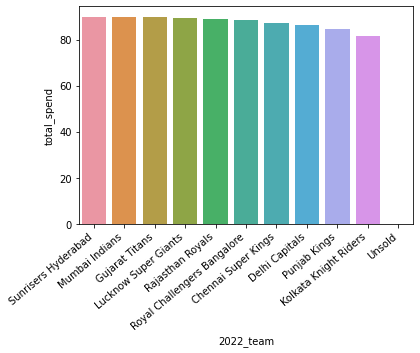

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""SELECT 2022_team, SUM(cost_inr) AS total_spend
    FROM ipl
    GROUP BY 2022_team
    ORDER BY total_spend DESC""").toPandas()

# Use the 'player' column for the x-axis and the 'cost_inr' column for the y-axis
ax = sns.barplot(x='2022_team', y='total_spend', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Show the plot
plt.show()


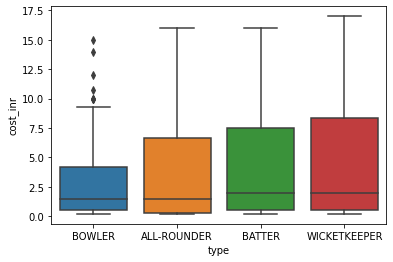

In [ ]:
import seaborn as sns

# Execute a query to select the type and cost from the ipl table
df2 = spark.sql("""
    SELECT type, cost_inr
    FROM ipl
""").toPandas()

# Use the 'type' column for the x-axis and the 'cost_inr' column for the y-axis
sns.boxplot(x='type', y='cost_inr', data=df2)

# Show the plot
plt.show()


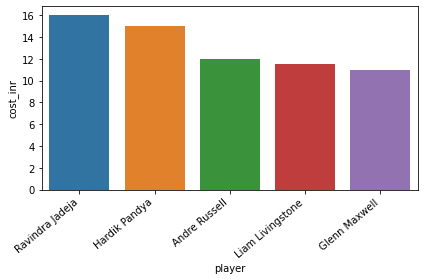

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""select player, cost_inr from ipl where type ='ALL-ROUNDER' order by 2 desc limit 5""").toPandas()

# Use the 'player' column for the x-axis and the 'cost_inr' column for the y-axis
ax = sns.barplot(x='player', y='cost_inr', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


# Show the plot
plt.show()


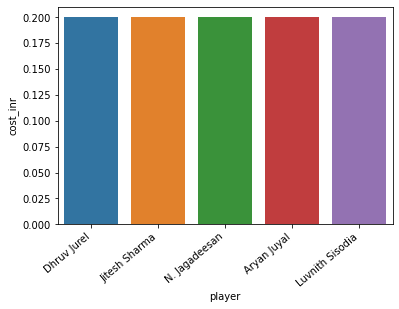

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""select player,cost_inr from ipl where type ='WICKETKEEPER' and cost_inr is not null order by 2 limit 5""").toPandas()

# Use the 'player' column for the x-axis and the 'cost_inr' column for the y-axis
ax = sns.barplot(x='player', y='cost_inr', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Show the plot
plt.show()


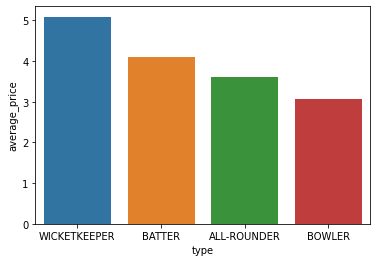

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""
    select type, round(avg(cost_inr), 2) average_price
    from ipl
    group by 1
    order by 2 desc
""").toPandas()

# Use the 'type' column for the x-axis and the 'average_price' column for the y-axis
sns.barplot(x='type', y='average_price', data=df2)

# Show the plot
plt.show()


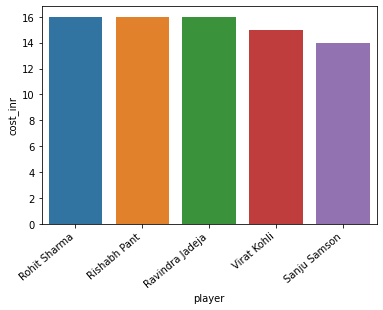

In [ ]:
import seaborn as sns

# Execute the query and save the results to a Pandas DataFrame
df2 = spark.sql("""
    select player, cost_inr
    from ipl
    where base_player = 'Retained'
    order by 2 desc
    limit 5
""").toPandas()

# Use the 'player' column for the x-axis and the 'cost_inr' column for the y-axis
ax = sns.barplot(x='player', y='cost_inr', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Show the plot
plt.show()
